In [1]:
using BasisFunctions, Plots

In [2]:
include("/home/tobias/Documents/IPP/Splines/periodicbsplines.jl")

In [24]:
nods = get_pbspline_nodes(Float64, 5)

5-element Array{Float64,1}:
 0.0 
 0.25
 0.5 
 0.75
 1.0 

In [27]:
Spl = PBSpline(2, nods)

PBSpline
    ↳ length = 5
    ↳ Float64 -> Float64
    ↳ support = 0.0..1.0 (Unit)



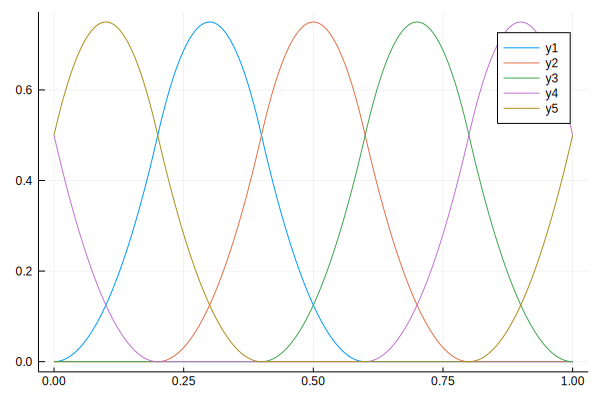

In [28]:
np = 1001
xp = collect(range(0,stop=1,length=np));
p = plot()
for i in 1:length(Spl)
    yp = Spl[i].(xp)
    plot!(p, xp, yp)
end
display(p)

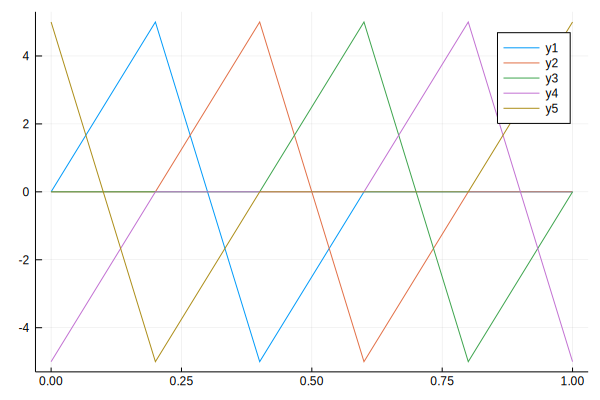

In [36]:
p = plot()
yp = zero(xp)
for i in 1:length(Spl)
    for j in 1:length(xp)
        yp[j] = eval_element_derivative(Spl, i, xp[j])
    end
    plot!(p, xp, yp)
end
display(p)

In [39]:
@time eval_element_derivative(Spl, 1, 0.1)

  0.000007 seconds (5 allocations: 176 bytes)


2.5

In [35]:
@time eval_element(Spl, 1, 0.4)

  0.000006 seconds (5 allocations: 176 bytes)


0.5

In [22]:
nodes(resize(Spl, 4))

4-element Array{Float64,1}:
 0.0               
 0.3333333333333333
 0.6666666666666666
 1.0               

In [23]:
Spl.nodes

6-element ScatteredGrid{Float64}:
 0.0
 0.2
 0.4
 0.6
 0.8
 1.0